# Used Car Price Prediction

In [54]:
### Load Dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [56]:
cars_df = pd.read_csv( "new_used_car.csv" )

In [57]:
cars_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,make,model,mileage_new,engine_new,power_new,KM_Driven
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,5,hyundai,creta,19.67,1582.0,126.20,4
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,9,honda,jazz,18.20,1199.0,88.70,4
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,8,maruti,ertiga,20.77,1248.0,88.76,8
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,7,audi,a4,15.20,1968.0,140.80,4
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,7,nissan,micra,23.08,1461.0,63.10,8


In [58]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4986 non-null   object 
 1   Location           4986 non-null   object 
 2   Year               4986 non-null   int64  
 3   Kilometers_Driven  4986 non-null   int64  
 4   Fuel_Type          4986 non-null   object 
 5   Transmission       4986 non-null   object 
 6   Owner_Type         4986 non-null   object 
 7   Mileage            4986 non-null   object 
 8   Engine             4962 non-null   object 
 9   Power              4962 non-null   object 
 10  Seats              4957 non-null   float64
 11  New_Price          633 non-null    object 
 12  Price              4986 non-null   float64
 13  age                4986 non-null   int64  
 14  make               4986 non-null   object 
 15  model              4986 non-null   object 
 16  mileage_new        4986 

In [59]:
#cars_df = cars_df[cars_df.Year > 2010]

### Feature Set Selection

In [60]:
cars_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'age', 'make', 'model', 'mileage_new',
       'engine_new', 'power_new', 'KM_Driven'],
      dtype='object')

In [61]:
x_features = ['KM_Driven', 'Fuel_Type',
              'Transmission', 'Owner_Type', 'Seats',
              'make', 'mileage_new', 'engine_new',
              'power_new', 'Location','model','age']
## model of the car is not included in the model

In [62]:
cat_features = ['Fuel_Type',
                'Transmission', 'Owner_Type', 
                'make', 'Location','model']

In [63]:
num_features = list(set(x_features) - set(cat_features))

In [64]:
num_features

['Seats', 'engine_new', 'KM_Driven', 'age', 'power_new', 'mileage_new']

In [65]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4986 non-null   object 
 1   Location           4986 non-null   object 
 2   Year               4986 non-null   int64  
 3   Kilometers_Driven  4986 non-null   int64  
 4   Fuel_Type          4986 non-null   object 
 5   Transmission       4986 non-null   object 
 6   Owner_Type         4986 non-null   object 
 7   Mileage            4986 non-null   object 
 8   Engine             4962 non-null   object 
 9   Power              4962 non-null   object 
 10  Seats              4957 non-null   float64
 11  New_Price          633 non-null    object 
 12  Price              4986 non-null   float64
 13  age                4986 non-null   int64  
 14  make               4986 non-null   object 
 15  model              4986 non-null   object 
 16  mileage_new        4986 

### Dropping Null Values

In [66]:
cars_df = cars_df[cars_df.Year > 2010 ][x_features + ['Price']].dropna()

In [67]:
cars_df.shape

(4058, 13)

In [68]:
cars_df.sample(5)

,KM_Driven,Fuel_Type,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location,model,age,Price
4287,5,Diesel,Automatic,First,5.0,audi,16.55,1968.0,147.51,Hyderabad,a4,9,18.00
1949,5,Diesel,Manual,First,5.0,hyundai,19.67,1582.0,126.20,Kolkata,creta,4,9.20
4120,3,Diesel,Manual,First,7.0,mahindra,15.10,2179.0,140.00,Delhi,xuv500,5,9.30
3217,6,Petrol,Manual,Second,5.0,volkswagen,15.04,1598.0,103.60,Pune,vento,7,4.50
1384,5,Petrol,Manual,First,5.0,hyundai,18.60,1197.0,81.83,Jaipur,i20,3,6.25


### Encode Categorical Variables

In [69]:
encoded_cars_df = pd.get_dummies(cars_df[x_features], 
                                 columns=cat_features)

In [70]:
encoded_cars_df.sample(5)

,KM_Driven,Seats,mileage_new,engine_new,power_new,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,...,model_xc60,model_xcent,model_xenon,model_xf,model_xuv300,model_xuv500,model_xylo,model_yeti,model_zen,model_zest
2221,7,5.0,16.80,1493.0,110.00,9,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2106,1,5.0,24.07,998.0,67.10,4,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2357,4,5.0,21.66,1498.0,103.52,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1343,6,5.0,16.98,998.0,66.10,7,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4641,0,5.0,17.80,1497.0,117.30,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
encoded_cars_df.columns

Index(['KM_Driven', 'Seats', 'mileage_new', 'engine_new', 'power_new', 'age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual',
       ...
       'model_xc60', 'model_xcent', 'model_xenon', 'model_xf', 'model_xuv300',
       'model_xuv500', 'model_xylo', 'model_yeti', 'model_zen', 'model_zest'],
      dtype='object', length=202)

In [72]:
encoded_cars_df.shape

(4058, 202)

### Setting X and y variables

In [73]:
X = encoded_cars_df
y = cars_df['Price']

### Data Splitting

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [76]:
X_train.shape

(3246, 202)

In [77]:
X_train[0:10]

,KM_Driven,Seats,mileage_new,engine_new,power_new,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,...,model_xc60,model_xcent,model_xenon,model_xf,model_xuv300,model_xuv500,model_xylo,model_yeti,model_zen,model_zest
1560,9,5.0,22.90,1248.0,74.00,7,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1885,2,5.0,14.62,1999.0,149.92,4,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2294,9,5.0,23.00,1396.0,90.00,8,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79,3,5.0,25.80,1498.0,98.60,5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4081,5,5.0,23.40,1248.0,74.00,5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1022,5,7.0,12.55,2982.0,168.50,5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4450,1,5.0,16.47,1198.0,74.00,6,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
872,3,5.0,15.29,1591.0,121.30,4,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
922,6,5.0,24.30,1248.0,88.50,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3351,8,5.0,18.00,1497.0,117.30,6,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
X_test.shape

(812, 202)

### Linear Models

Assumes linear relationship between features and outcome variable.

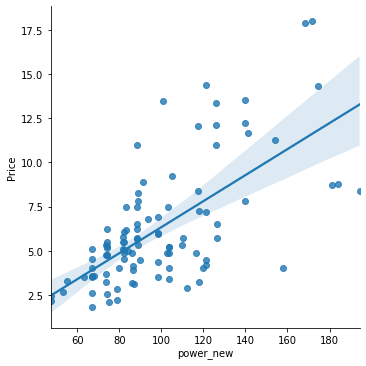

In [79]:
sn.lmplot( data = cars_df.sample(100),
           x = 'power_new',
           y = 'Price');

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lreg_v1 = LinearRegression()

In [82]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [83]:
lreg_v1.intercept_

12.827171969794911

In [84]:
lreg_v1.coef_

array([-1.29180547e-01, -1.82669470e-01, -4.70383047e-02, -9.01907889e-04,
        3.14237509e-02, -5.84741823e-01,  5.23944018e-01, -5.23944018e-01,
        4.12349353e-01, -4.12349353e-01,  2.49698406e-01, -4.09944905e-03,
       -2.45598958e-01,  5.16253936e+00,  4.76746606e+00, -3.13195760e+00,
       -4.63445101e+00, -3.03103746e+00,  2.87224143e-01, -2.74987514e+00,
       -1.96486363e+00, -3.52595311e+00, -1.14128208e-01,  1.54186201e+00,
        2.19029690e+00,  3.46370409e+00, -1.88743229e+00, -1.68883985e+00,
        3.63831535e+00,  3.90384867e+00,  2.21591422e+00, -1.84534374e+00,
       -4.41491288e-12, -2.25992120e+00, -9.73865102e-01, -3.14759675e+00,
        2.55206990e+00, -2.46801288e+00,  3.70003728e+00, -1.05035368e-01,
        9.05899118e-01,  2.17665871e-01,  6.87099763e-01, -7.66563460e-01,
        8.63222147e-01,  2.32933612e-03, -2.02128237e-01, -1.13331550e+00,
       -3.82046578e-01, -8.71270927e-02,  9.23304112e-02, -1.36548107e+00,
        2.28330800e+00,  

In [85]:
dict(zip(X_train.columns, np.round(lreg_v1.coef_, 3)))

{'KM_Driven': -0.129,
 'Seats': -0.183,
 'mileage_new': -0.047,
 'engine_new': -0.001,
 'power_new': 0.031,
 'age': -0.585,
 'Fuel_Type_Diesel': 0.524,
 'Fuel_Type_Petrol': -0.524,
 'Transmission_Automatic': 0.412,
 'Transmission_Manual': -0.412,
 'Owner_Type_First': 0.25,
 'Owner_Type_Second': -0.004,
 'Owner_Type_Third': -0.246,
 'make_audi': 5.163,
 'make_bmw': 4.767,
 'make_chevrolet': -3.132,
 'make_datsun': -4.634,
 'make_fiat': -3.031,
 'make_force': 0.287,
 'make_ford': -2.75,
 'make_honda': -1.965,
 'make_hyundai': -3.526,
 'make_isuzu': -0.114,
 'make_jaguar': 1.542,
 'make_jeep': 2.19,
 'make_land': 3.464,
 'make_mahindra': -1.887,
 'make_maruti': -1.689,
 'make_mercedes-benz': 3.638,
 'make_mini': 3.904,
 'make_mitsubishi': 2.216,
 'make_nissan': -1.845,
 'make_porsche': -0.0,
 'make_renault': -2.26,
 'make_skoda': -0.974,
 'make_tata': -3.148,
 'make_toyota': 2.552,
 'make_volkswagen': -2.468,
 'make_volvo': 3.7,
 'Location_Ahmedabad': -0.105,
 'Location_Bangalore': 0.906,

### Predict on test set

In [86]:
y_pred = lreg_v1.predict(X_test)

In [87]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [88]:
y_df.sample(10)

,actual,predicted,residual
952,17.18,17.991703,0.811703
1266,4.50,3.327151,-1.172849
1139,3.50,4.186113,0.686113
679,1.75,1.962003,0.212003
4023,2.50,2.907348,0.407348
4745,11.00,12.003455,1.003455
4563,18.75,16.262875,-2.487125
1800,6.45,7.000151,0.550151
4483,2.60,3.205433,0.605433
2451,4.50,3.891110,-0.608890


### Measuring Accuracy

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [91]:
mse_v1

1.65873413747327

In [92]:
rmse_v1 = np.sqrt(mse_v1)

In [93]:
rmse_v1

1.287918529051147

In [94]:
r2_score(y_test, y_pred)

0.8822260819200884

/Users/susmahad/anaconda/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

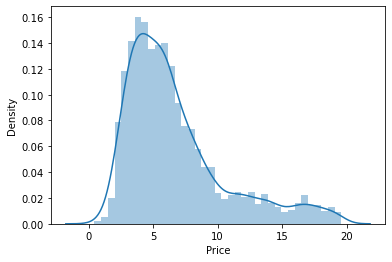

In [95]:
sn.distplot(cars_df.Price)

### Preprocessing data based on business context

1. Removing all cars prior to 2011
2. Making an adjustment to price based on inflation rate. But we need to know the year of sale (not available)
3. Adding the car model as a feature (need to prepare data properly)
4. Taking log of the price (as price is skewed distribution)

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
5. Noise (randomness)
   

### Cross Validation

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
scores = cross_val_score(LinearRegression(),
                         X_train,
                         y_train,
                         cv = 10,
                         scoring = 'r2')

In [98]:
scores

array([ 8.73644329e-01,  8.87691893e-01,  8.96208725e-01,  9.31242970e-01,
       -4.15787711e+11, -2.93092398e+14,  9.12034086e-01,  9.04468368e-01,
        9.22214814e-01,  9.26882064e-01])

In [99]:
scores.mean()

-29350818612506.22

In [100]:
scores.std()

87913947332363.77

### Saving the model

In [101]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [102]:
my_model = CarPredictionModel(lreg_v1, list(X_train.columns), rmse_v1)

In [103]:
# Uncomment this code for older version of sklearn
#from sklearn.externals import joblib
#joblib.dump(my_model, './cars.pkl')

In [104]:
from joblib import dump

In [105]:
dump(my_model, './cars.pkl')

['./cars.pkl']

### Tasks

1. Removing all cars prior to 2011
2. Add age as numerical variable
3. Build a new model
4. Predict on test set and measure the accuracy (RMSE and R Squared values)
5. Do the cross Validation and find the mean and std of the r2 values